In [2]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from timeit import default_timer as timer
from matplotlib.ticker import MaxNLocator

## 300 Patients, pmf = 0.4

In [3]:
# Create an empty dictionary to store the data frames
dfs_300_patients = {}

# Run the command 5 times in a loop and store the results in different data frames
for i in range(1, 6):
    command_300_patients = "C:/Users/tus88262/Documents/GitHub/2019-test-ppq-pk/build/Debug/run_ppq_pk.exe --lum --pmf 0.4 -n 300"
    output_300_patients = subprocess.run(command_300_patients, capture_output=True, text=True)
    lines_300_patients = output_300_patients.stdout.splitlines()
    df_300_patients = pd.DataFrame([line.split(',') for line in lines_300_patients], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
    df_300_patients = df_300_patients.iloc[1:]
    df_300_patients = df_300_patients.apply(pd.to_numeric, errors='coerce')
    dfs_300_patients[f'df_{i}'] = df_300_patients

# Access the data frames using the labels df_1, df_2, ..., df_5
df_1 = dfs_300_patients['df_1']
df_2 = dfs_300_patients['df_2']
df_3 = dfs_300_patients['df_3']
df_4 = dfs_300_patients['df_4']
df_5 = dfs_300_patients['df_5']

In [4]:
# Create an empty dictionary to store the wide-format DataFrames
wide_dfs_300_patients = {}

for i in range(1, 6):
    wide_dfs_300_patients[f'df_{i}_wide'] = globals()[f'df_{i}'].pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")

# Extracting individual DataFrames from the dictionary
df_1_wide = wide_dfs_300_patients['df_1_wide']
df_2_wide = wide_dfs_300_patients['df_2_wide']
df_3_wide = wide_dfs_300_patients['df_3_wide']
df_4_wide = wide_dfs_300_patients['df_4_wide']
df_5_wide = wide_dfs_300_patients['df_5_wide']

In [5]:
# Create empty dictionaries to store the data frames
dfs_300_patients_day14 = {}
dfs_300_patients_day28 = {}
dfs_300_patients_day14_day28_merged = {}

# Process the wide-format DataFrames in a loop and store the results in different dictionaries
for i in range(1, 6):
    df_wide = globals()[f"df_{i}_wide"]  # Access the wide-format DataFrame
    df_300_patients_day14 = df_wide.loc[336.0]
    df_300_patients_day14_sorted = df_300_patients_day14.sort_values()
    df_300_patients_day28 = df_wide.loc[671.0]
    df_300_patients_day28_sorted = df_300_patients_day28.sort_values()

    # Merge the DataFrames on the index 'PID'
    df_300_patients_days_14_28_merged = pd.merge(df_300_patients_day14, df_300_patients_day28, on='PID')
    df_300_patients_days_14_28_merged = df_300_patients_days_14_28_merged.rename(columns={336.0:'day14', 671.0:'day28'})

    # Store the results in different dictionaries
    dfs_300_patients_day14[f'df_{i}'] = df_300_patients_day14_sorted
    dfs_300_patients_day28[f'df_{i}'] = df_300_patients_day28_sorted
    dfs_300_patients_day14_day28_merged[f'df_{i}'] = df_300_patients_days_14_28_merged

#Creating dataframes from dictionaries

#Day 14 sorted dataframe
df_1_day14 = dfs_300_patients_day14['df_1']
df_1_day14 = df_1_day14.to_frame(name="Day14_ParasiteDensity")

df_2_day14 = dfs_300_patients_day14['df_2']
df_2_day14 = df_2_day14.to_frame(name="Day14_ParasiteDensity")


df_3_day14 = dfs_300_patients_day14['df_3']
df_3_day14 = df_3_day14.to_frame(name="Day14_ParasiteDensity")


df_4_day14 = dfs_300_patients_day14['df_4']
df_4_day14 = df_4_day14.to_frame(name="Day14_ParasiteDensity")

df_5_day14 = dfs_300_patients_day14['df_5']
df_5_day14 = df_5_day14.to_frame(name="Day14_ParasiteDensity")


#Day 28 sorted dataframe
df_1_day28 = dfs_300_patients_day28['df_1']
df_1_day28 = df_1_day28.to_frame(name="Day28_ParasiteDensity")

df_2_day28 = dfs_300_patients_day28['df_2']
df_2_day28 = df_2_day28.to_frame(name="Day28_ParasiteDensity")

df_3_day28 = dfs_300_patients_day28['df_3']
df_3_day28 = df_3_day28.to_frame(name="Day28_ParasiteDensity")

df_4_day28 = dfs_300_patients_day28['df_4']
df_4_day28 = df_4_day28.to_frame(name="Day28_ParasiteDensity")

df_5_day28 = dfs_300_patients_day28['df_5']
df_5_day28 = df_5_day28.to_frame(name="Day28_ParasiteDensity")


#Day 14 and day 28 merged dataframes
df_1_day14_day28_merged = dfs_300_patients_day14_day28_merged['df_1']
df_2_day14_day28_merged = dfs_300_patients_day14_day28_merged['df_2']
df_3_day14_day28_merged = dfs_300_patients_day14_day28_merged['df_3']
df_4_day14_day28_merged = dfs_300_patients_day14_day28_merged['df_4']
df_5_day14_day28_merged = dfs_300_patients_day14_day28_merged['df_5']

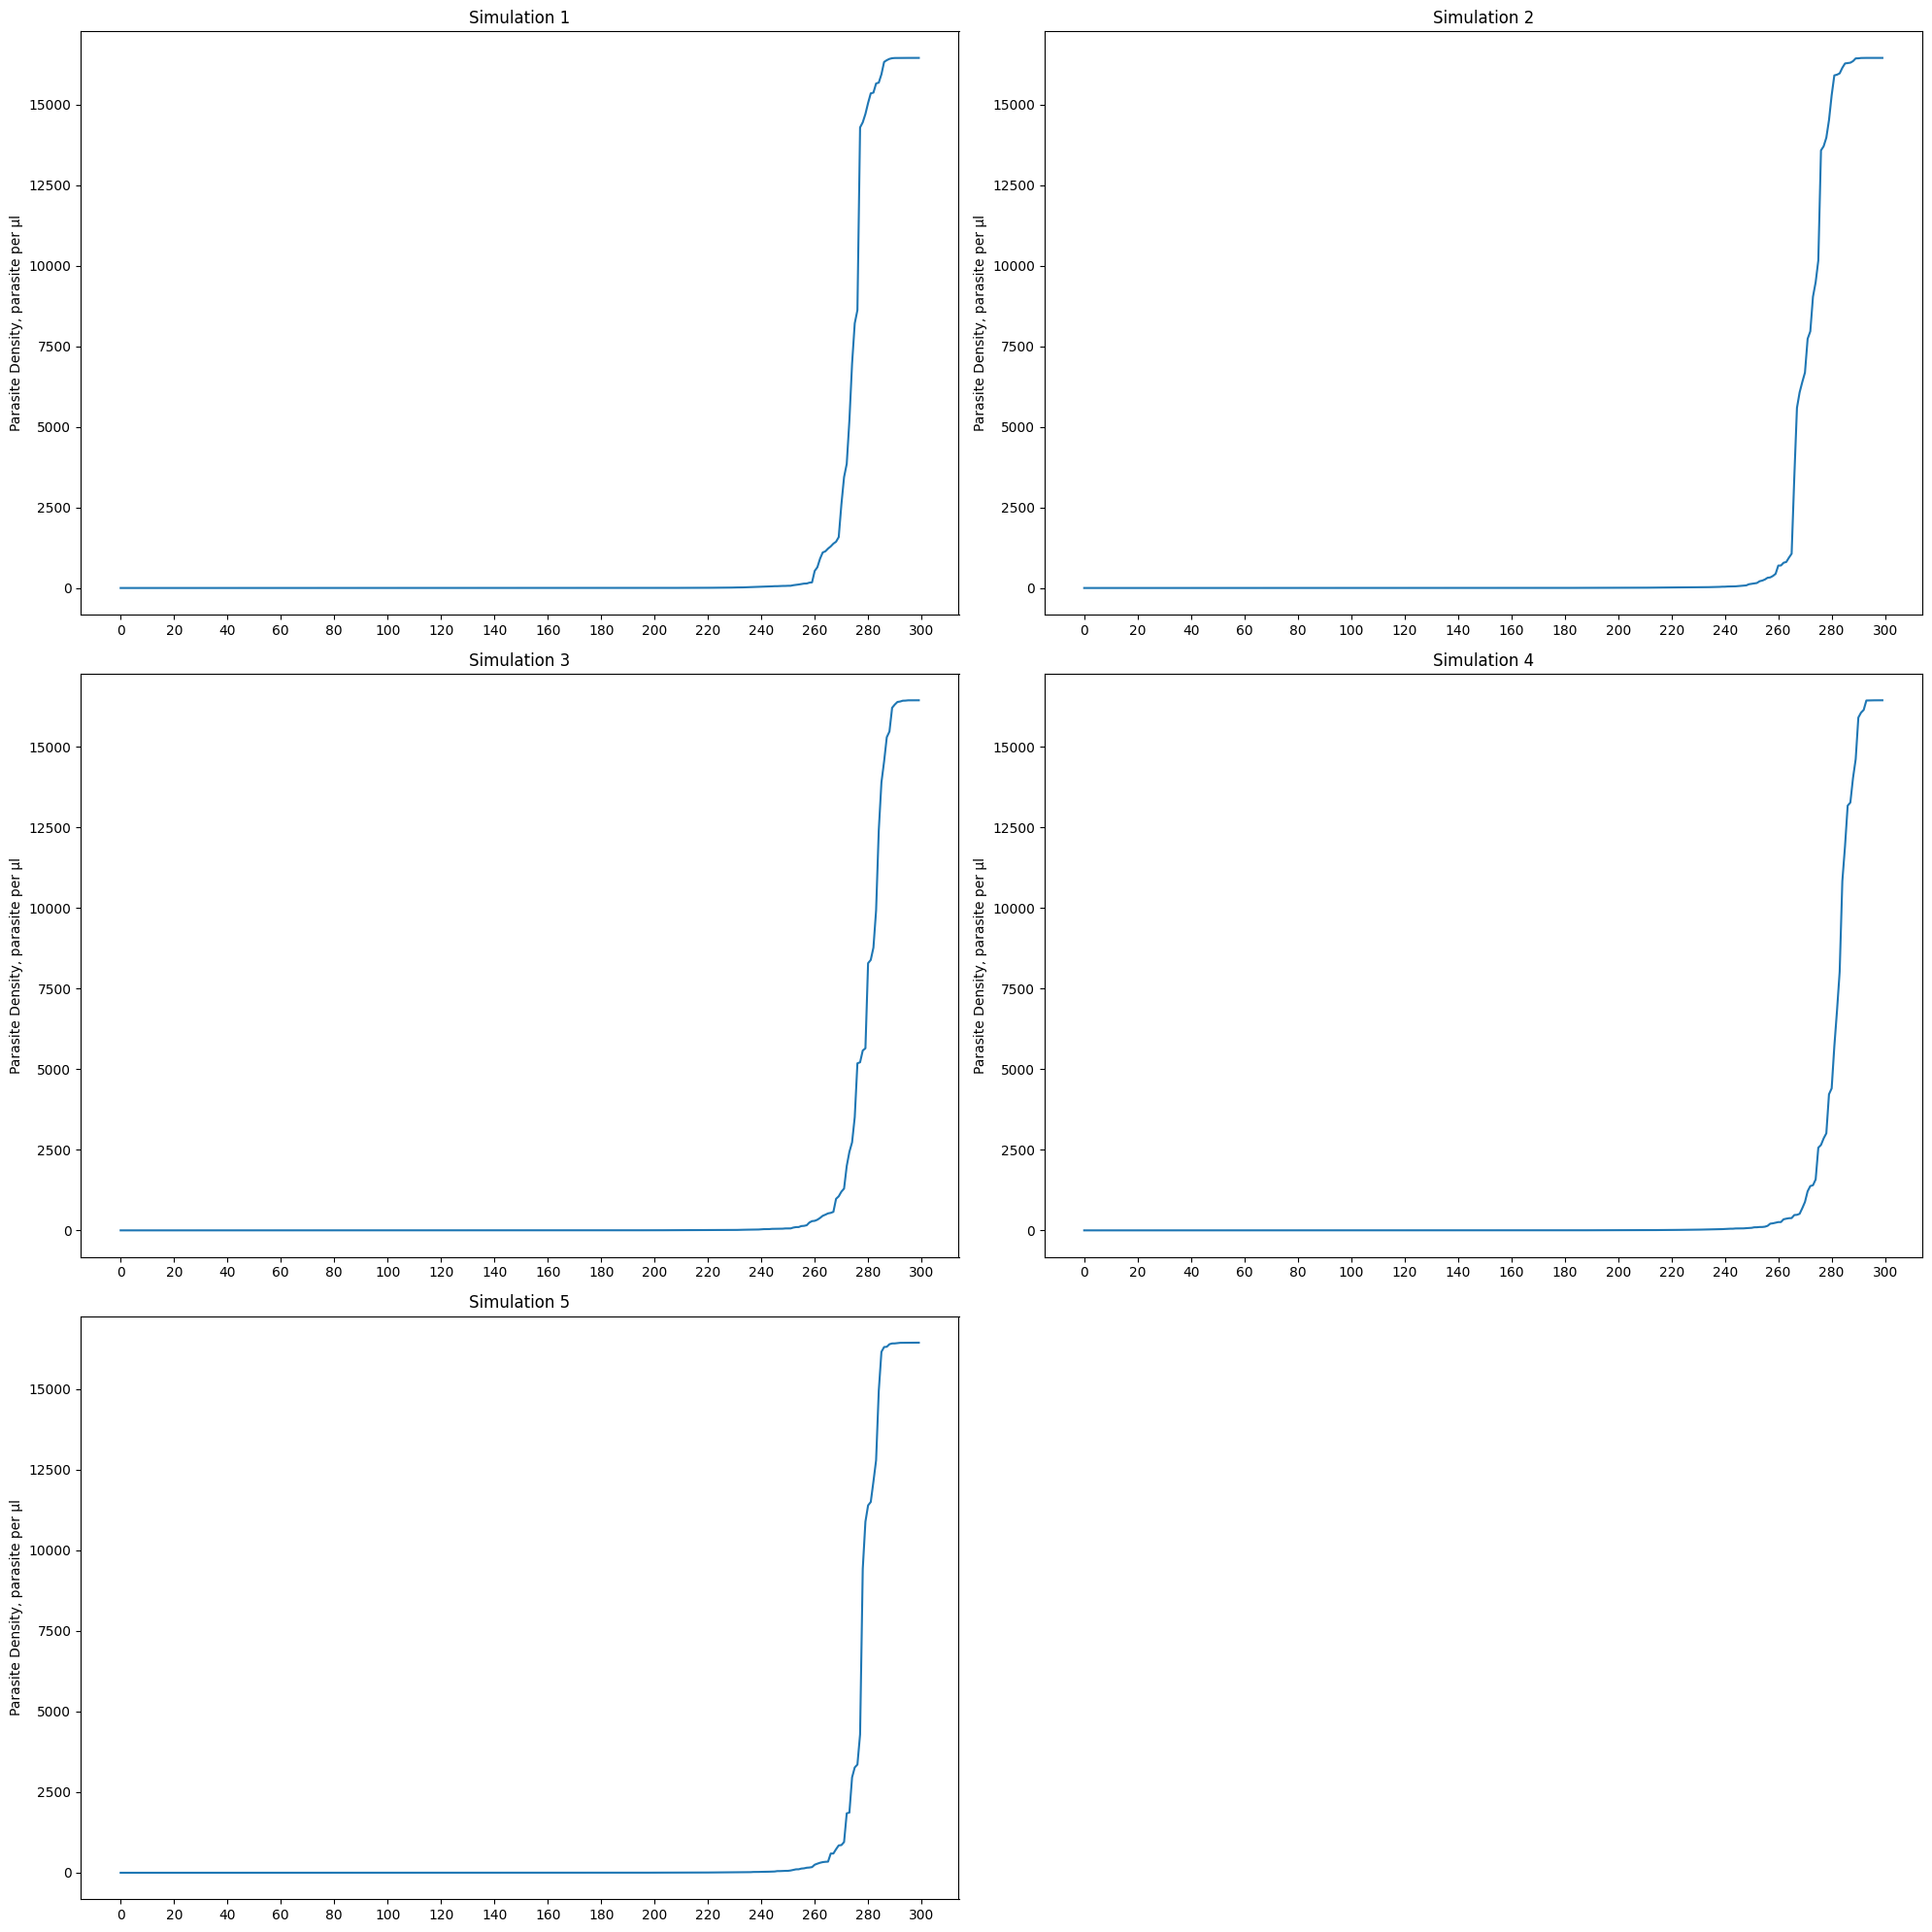

In [25]:
# Number of rows and columns for the subplot grid
nrows = 3
ncols = 2

# Create a new figure
plt.figure(figsize=(20, 20))

for i in range(1, 6):
    ax = plt.subplot(nrows, ncols, i)
    temp = dfs_300_patients_day14[f"df_{i}"]
    temp = temp.to_frame(name="Day14_ParasiteDensity")
    temp = temp.reset_index().rename(columns={'index': 'PID'})
    plt.plot(range(len(temp)), temp['Day14_ParasiteDensity'])  # Use range of length for x-axis
    # Set x-ticks to show PID values
    #plt.xticks(range(len(temp)), temp['PID'], rotation='vertical')  # Set x-ticks to PID values
    #plt.xticks(range(len(temp)), rotation='vertical')  # Set x-ticks to PID values
    #plt.xticks(rotation=90)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=20))  # Adjust 'nbins' as needed
    plt.title('Day 14 Parasite Density')
    plt.title(f"Simulation {i}")
    #plt.legend()  # Add a legend
    # Add labels to the y axis of the figure
    plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

#Save plot
#plt.savefig('lum_day_14_pd_merged_sorted.png')

# Show the plot
plt.tight_layout()
plt.show()

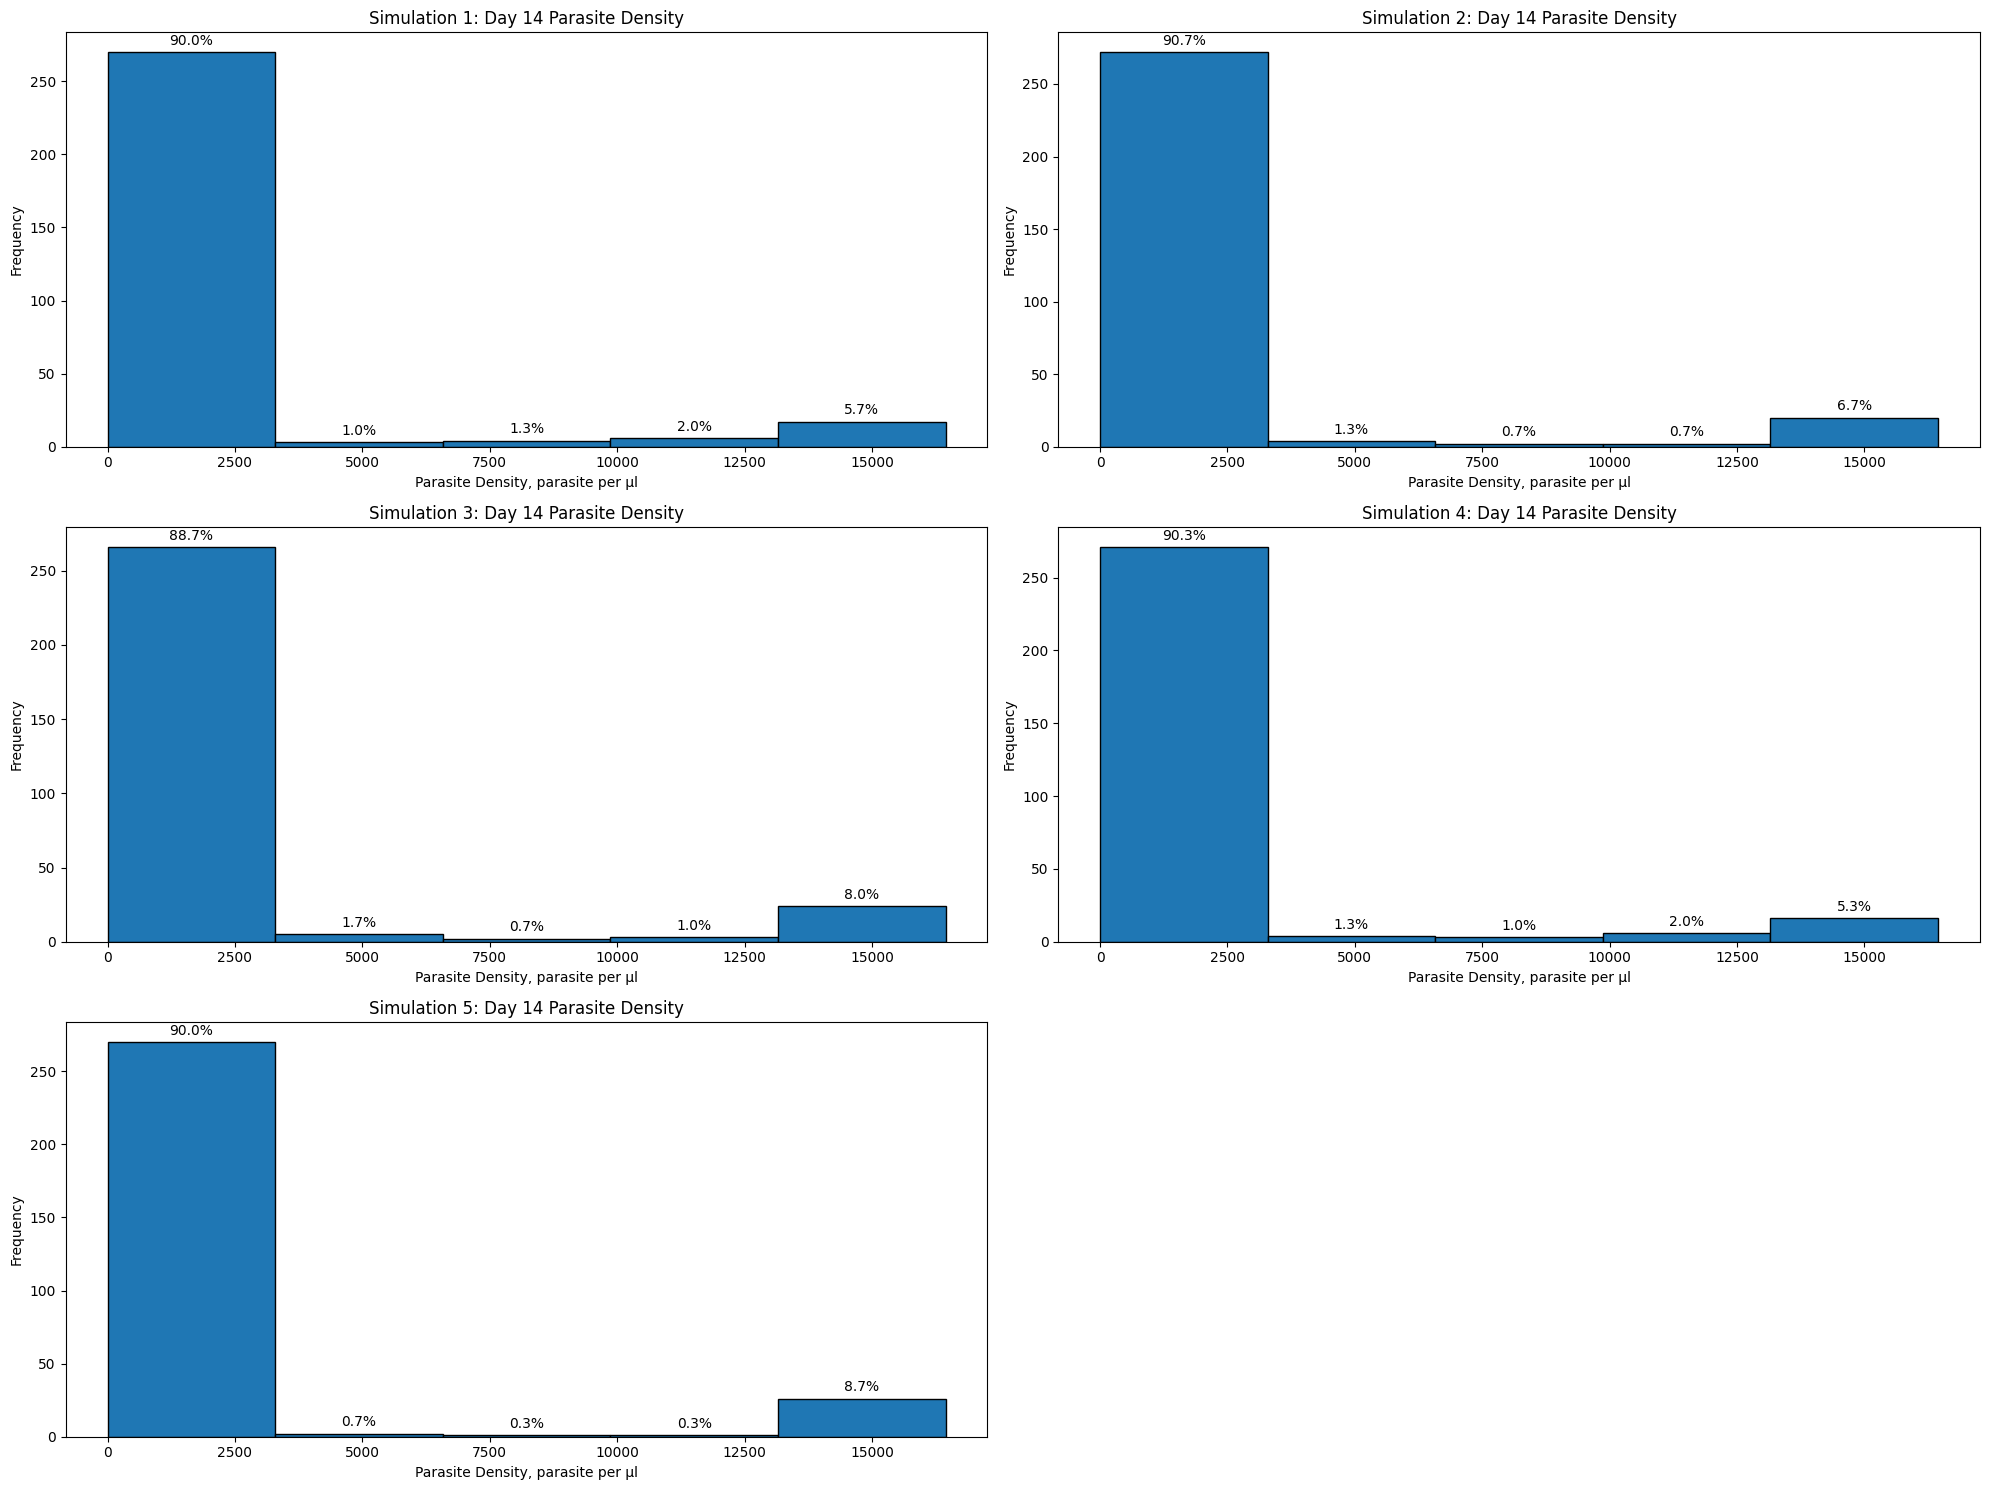

In [6]:
# Number of rows and columns for the subplot grid
nrows = 3
ncols = 2

# Create a new figure
plt.figure (figsize=(20, 15))

for i in range(1, 6):
    ax = plt.subplot(nrows, ncols, i)
    temp = dfs_300_patients_day14[f"df_{i}"]
    temp = temp.to_frame(name="Day14_ParasiteDensity")
    counts, bins, patches = plt.hist(temp['Day14_ParasiteDensity'],bins=5, edgecolor = 'black')  
    
    # Calculate total number of observations for percentage calculation
    total = counts.sum()
    # Annotate bars with percentage
    for count, patch in zip(counts, patches):
        percentage = f'{100 * count / total:.1f}%'
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        offset = total / 100
        plt.text(x, y+offset, percentage, ha='center', va='bottom')
        
    plt.title(f"Simulation {i}: Day 14 Parasite Density")
    # Add labels to the x and y axes of the figure
    plt.xlabel("Parasite Density, parasite per µl")  # X-axis label
    plt.ylabel('Frequency')  # Y-axis label

#Save plot
#plt.savefig('lum_day_14_pd_merged_.png')

# Show the plot
plt.tight_layout()
plt.show()

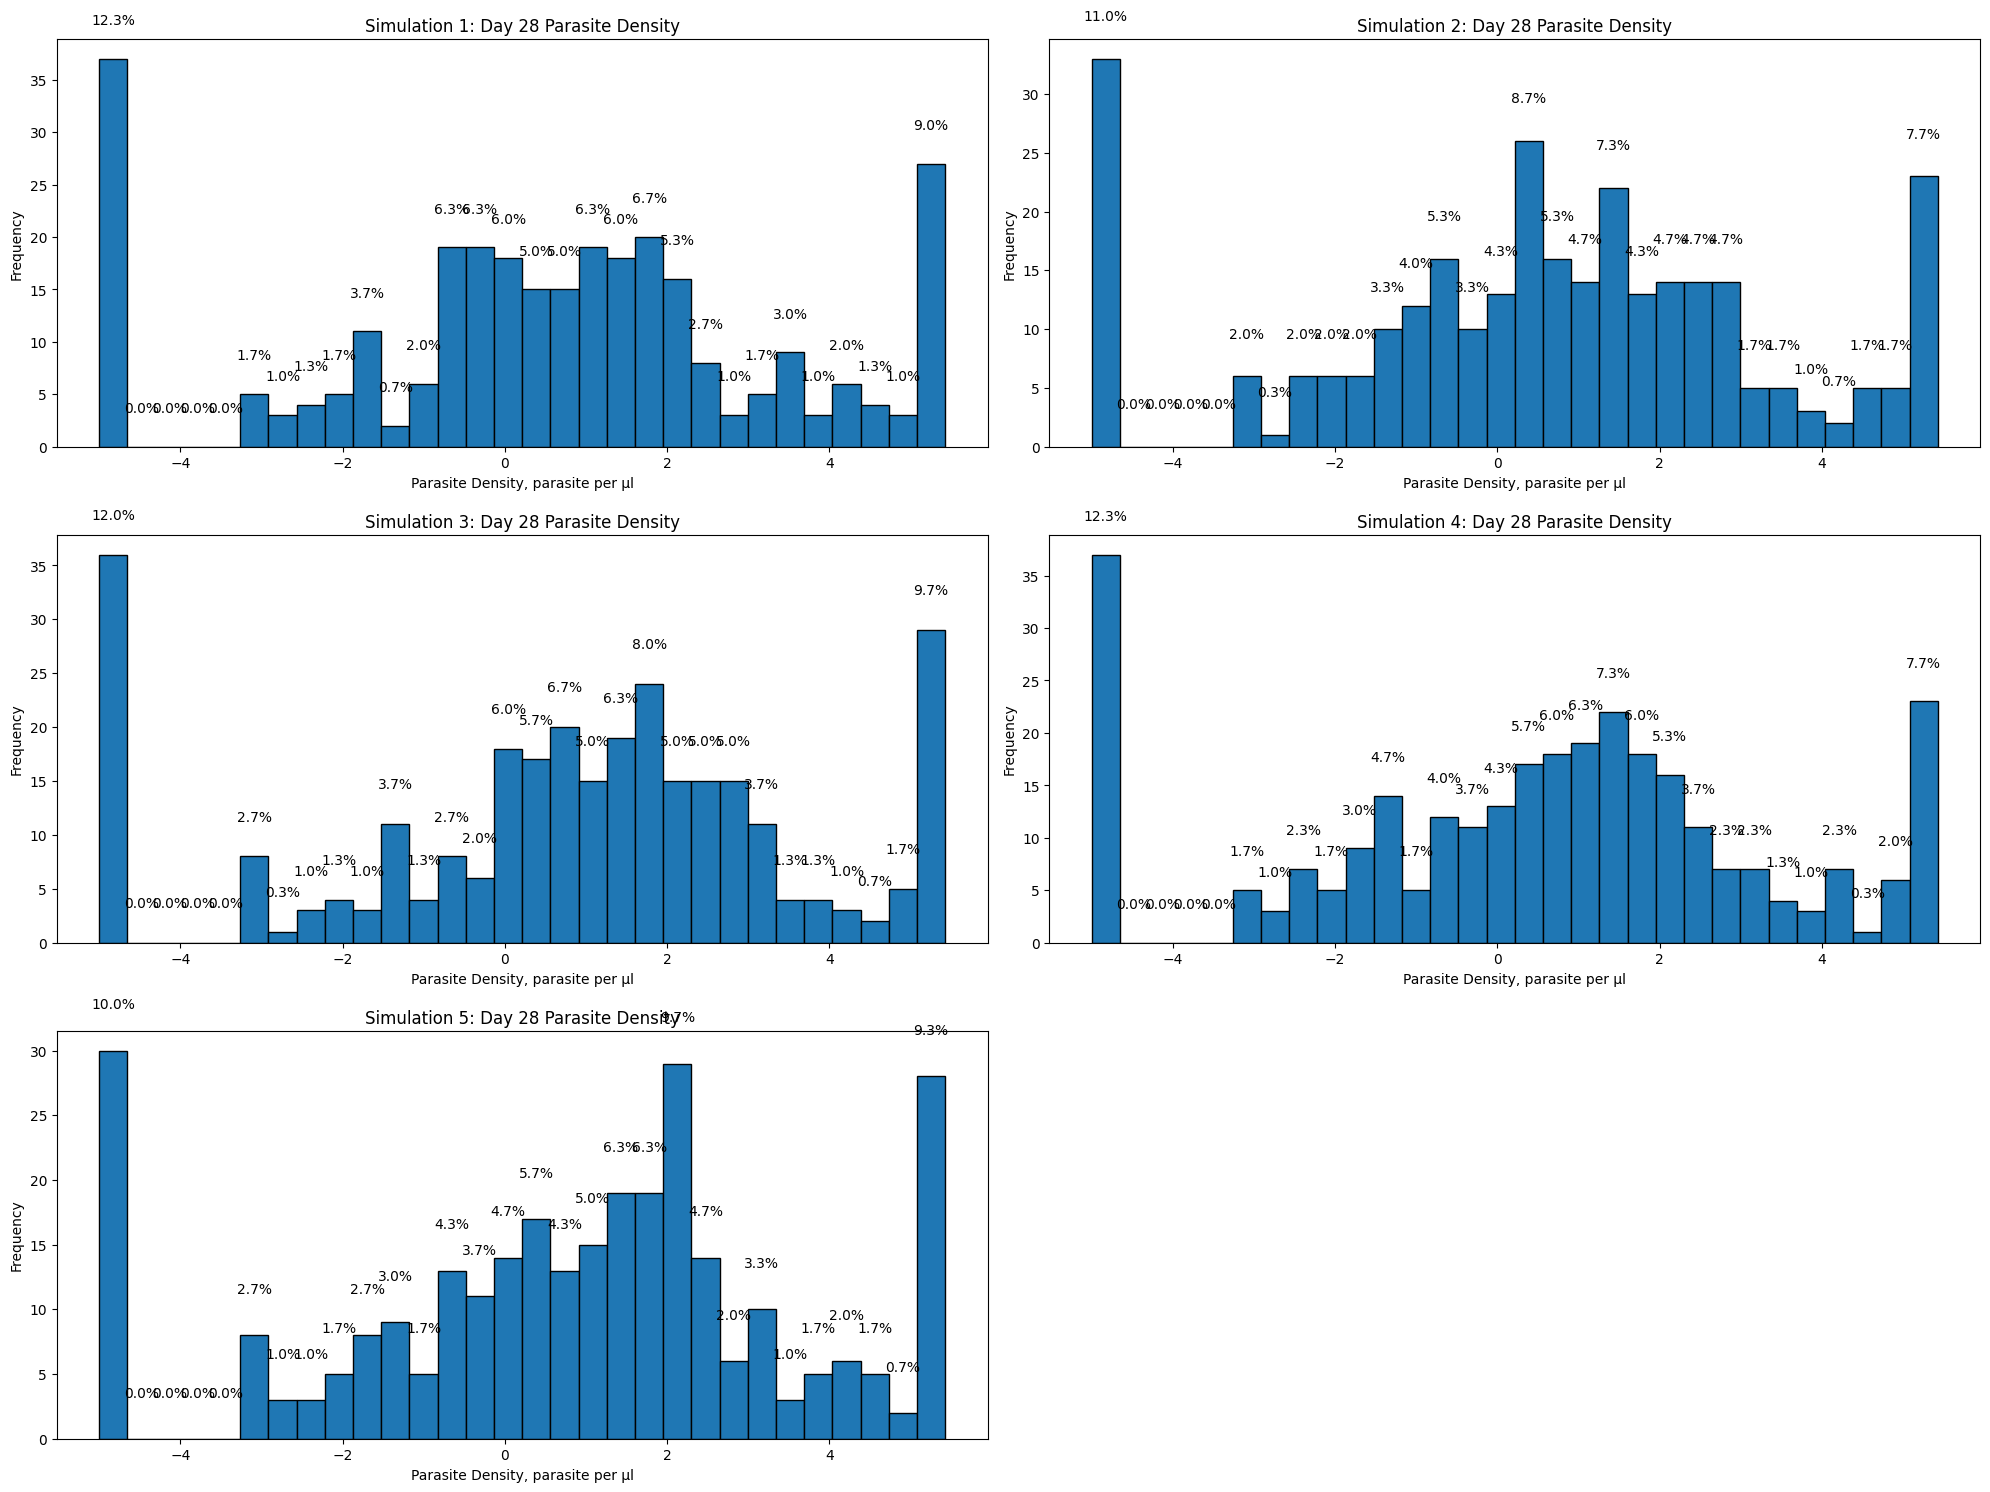

In [12]:
# Number of rows and columns for the subplot grid
nrows = 3
ncols = 2

# Create a new figure
plt.figure(figsize=(20, 15))

for i in range(1, 6):
    ax = plt.subplot(nrows, ncols, i)
    temp = dfs_300_patients_day28[f"df_{i}"]
    temp = np.log10(temp + 0.00001)
    temp = temp.to_frame(name="Day28_ParasiteDensity")
    counts, bins, patches = plt.hist(temp['Day28_ParasiteDensity'],bins=30, edgecolor = 'black')  
    
    # Calculate total number of observations for percentage calculation
    total = counts.sum()
    # Annotate bars with percentage
    for count, patch in zip(counts, patches):
        percentage = f'{100 * count / total:.1f}%'
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        offset = total / 100
        plt.text(x, y+offset, percentage, ha='center', va='bottom')

    plt.title(f"Simulation {i}: Day 28 Parasite Density")
    # Add labels to the x and y axes of the figure
    plt.xlabel("Parasite Density, parasite per µl")  # X-axis label
    plt.ylabel('Frequency')  # Y-axis label

#Save plot
#plt.savefig('lum_day_14_pd_merged_.png')

# Show the plot
plt.tight_layout()
plt.show()

#Kernel Density Function, Plot, find related plots
Carrying capacity K in papers, find PMF from Salaralmaba, Lisa White
Logistic growth equation
Killing rate is very small